### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
churn=pd.read_csv("churn_dataset.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### check the shape of the data

In [3]:
churn.shape

(7043, 21)

### Check information about the data

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.duplicated().sum()

0

In [6]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
churn=churn[churn["TotalCharges"] != " "]
churn["TotalCharges"]=churn["TotalCharges"].astype(float)

### Label Encoding

In [9]:
for i in churn.select_dtypes(include="object").columns:
    le=LabelEncoder()
    churn[i]=le.fit_transform(churn[i])

### Separate the data

In [10]:
X=churn.drop(["Churn","customerID"], axis=1)
y=churn["Churn"]

### Split the data into training and testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [13]:
y_test.value_counts()

Churn
0    1033
1     374
Name: count, dtype: int64

### Feature Scaling using standardscaler

In [14]:
scaled=StandardScaler()
X_train_scaled= scaled.fit_transform(X_train)
X_test_scaled= scaled.transform(X_test)

### Instatiation

In [15]:
log=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=5)
svc=SVC()

### Storing accuracy and precision

In [16]:
test_accuracy=[]
test_precision=[]
training_accuracy=[]
training_precision=[]

### Logistic Regression

In [17]:
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
log_pred_train=log.predict(X_train_scaled)
log_pred_test=log.predict(X_test_scaled)

In [19]:
print("training accuracy - ",accuracy_score(y_train,log_pred_train))
print("testing accuracy - ",accuracy_score(y_test,log_pred_test))

training accuracy -  0.8030222222222222
testing accuracy -  0.7938877043354655


In [20]:
print("training precision - ",precision_score(y_train,log_pred_train))
print("testing precision - ",precision_score(y_test,log_pred_test))

training precision -  0.6539379474940334
testing precision -  0.6242603550295858


In [21]:
test_accuracy.append(accuracy_score(y_test,log_pred_test))
test_precision.append(precision_score(y_test,log_pred_test, pos_label=1))

In [22]:
training_accuracy.append(accuracy_score(y_train,log_pred_train))
training_precision.append(precision_score(y_train,log_pred_train, pos_label=1))

In [23]:
print("confusion matrix for training")
print(confusion_matrix(y_train,log_pred_train))
print("confusion matrix for testing")
print(confusion_matrix(y_test,log_pred_test))

confusion matrix for training
[[3695  435]
 [ 673  822]]
confusion matrix for testing
[[906 127]
 [163 211]]


In [24]:
print("classification report for training")
print(classification_report(y_train,log_pred_train))
print("classification report for testing")
print(classification_report(y_test,log_pred_test))

classification report for training
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4130
           1       0.65      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.79      0.80      0.80      5625

classification report for testing
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



### KNN

In [25]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [26]:
knn_pred_train=knn.predict(X_train_scaled)
knn_pred_test=knn.predict(X_test_scaled)

In [27]:
print("training accuracy - ",accuracy_score(y_train,knn_pred_train))
print("testing accuracy - ",accuracy_score(y_test,knn_pred_test))

training accuracy -  0.8341333333333333
testing accuracy -  0.7484008528784648


In [28]:
print("training precision - ",precision_score(y_train,knn_pred_train))
print("testing precision - ",precision_score(y_test,knn_pred_test))

training precision -  0.7093889716840537
testing precision -  0.5264550264550265


In [29]:
test_accuracy.append(accuracy_score(y_test,knn_pred_test))
test_precision.append(precision_score(y_test,knn_pred_test, pos_label=1))

In [30]:
training_accuracy.append(accuracy_score(y_train,knn_pred_train))
training_precision.append(precision_score(y_train,knn_pred_train, pos_label=1))

In [31]:
print("confusion matrix for training")
print(confusion_matrix(y_train,knn_pred_train))
print("confusion matrix for testing")
print(confusion_matrix(y_test,knn_pred_test))

confusion matrix for training
[[3740  390]
 [ 543  952]]
confusion matrix for testing
[[854 179]
 [175 199]]


In [32]:
print("classification report for training")
print(classification_report(y_train,knn_pred_train))
print("classification report for testing")
print(classification_report(y_test,knn_pred_test))

classification report for training
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4130
           1       0.71      0.64      0.67      1495

    accuracy                           0.83      5625
   macro avg       0.79      0.77      0.78      5625
weighted avg       0.83      0.83      0.83      5625

classification report for testing
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.53      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



### SVM

In [33]:
svc.fit(X_train_scaled, y_train)

SVC()

In [34]:
svc_pred_train=svc.predict(X_train_scaled)
svc_pred_test=svc.predict(X_test_scaled)

In [35]:
print("training accuracy - ",accuracy_score(y_train,svc_pred_train))
print("testing accuracy - ",accuracy_score(y_test,svc_pred_test))

training accuracy -  0.8247111111111111
testing accuracy -  0.7853589196872779


In [36]:
print("training precision - ",precision_score(y_train,svc_pred_train))
print("testing precision - ",precision_score(y_test,svc_pred_test))

training precision -  0.7358665430954587
testing precision -  0.6267605633802817


In [37]:
test_accuracy.append(accuracy_score(y_test,svc_pred_test))
test_precision.append(precision_score(y_test,svc_pred_test, pos_label=1))

In [38]:
training_accuracy.append(accuracy_score(y_train,svc_pred_train))
training_precision.append(precision_score(y_train,svc_pred_train, pos_label=1))

In [39]:
print("confusion matrix for training")
print(confusion_matrix(y_train,svc_pred_train))
print("confusion matrix for testing")
print(confusion_matrix(y_test,svc_pred_test))

confusion matrix for training
[[3845  285]
 [ 701  794]]
confusion matrix for testing
[[927 106]
 [196 178]]


In [40]:
print("classification report for training")
print(classification_report(y_train,svc_pred_train))
print("classification report for testing")
print(classification_report(y_test,svc_pred_test))

classification report for training
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4130
           1       0.74      0.53      0.62      1495

    accuracy                           0.82      5625
   macro avg       0.79      0.73      0.75      5625
weighted avg       0.82      0.82      0.81      5625

classification report for testing
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



### Tree algorithms

In [41]:
dt=DecisionTreeClassifier(max_depth=5)
rf=RandomForestClassifier(max_depth=5, class_weight='balanced',random_state=42)
ada=AdaBoostClassifier()
gbdt=GradientBoostingClassifier()

### Decision Tree

In [42]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

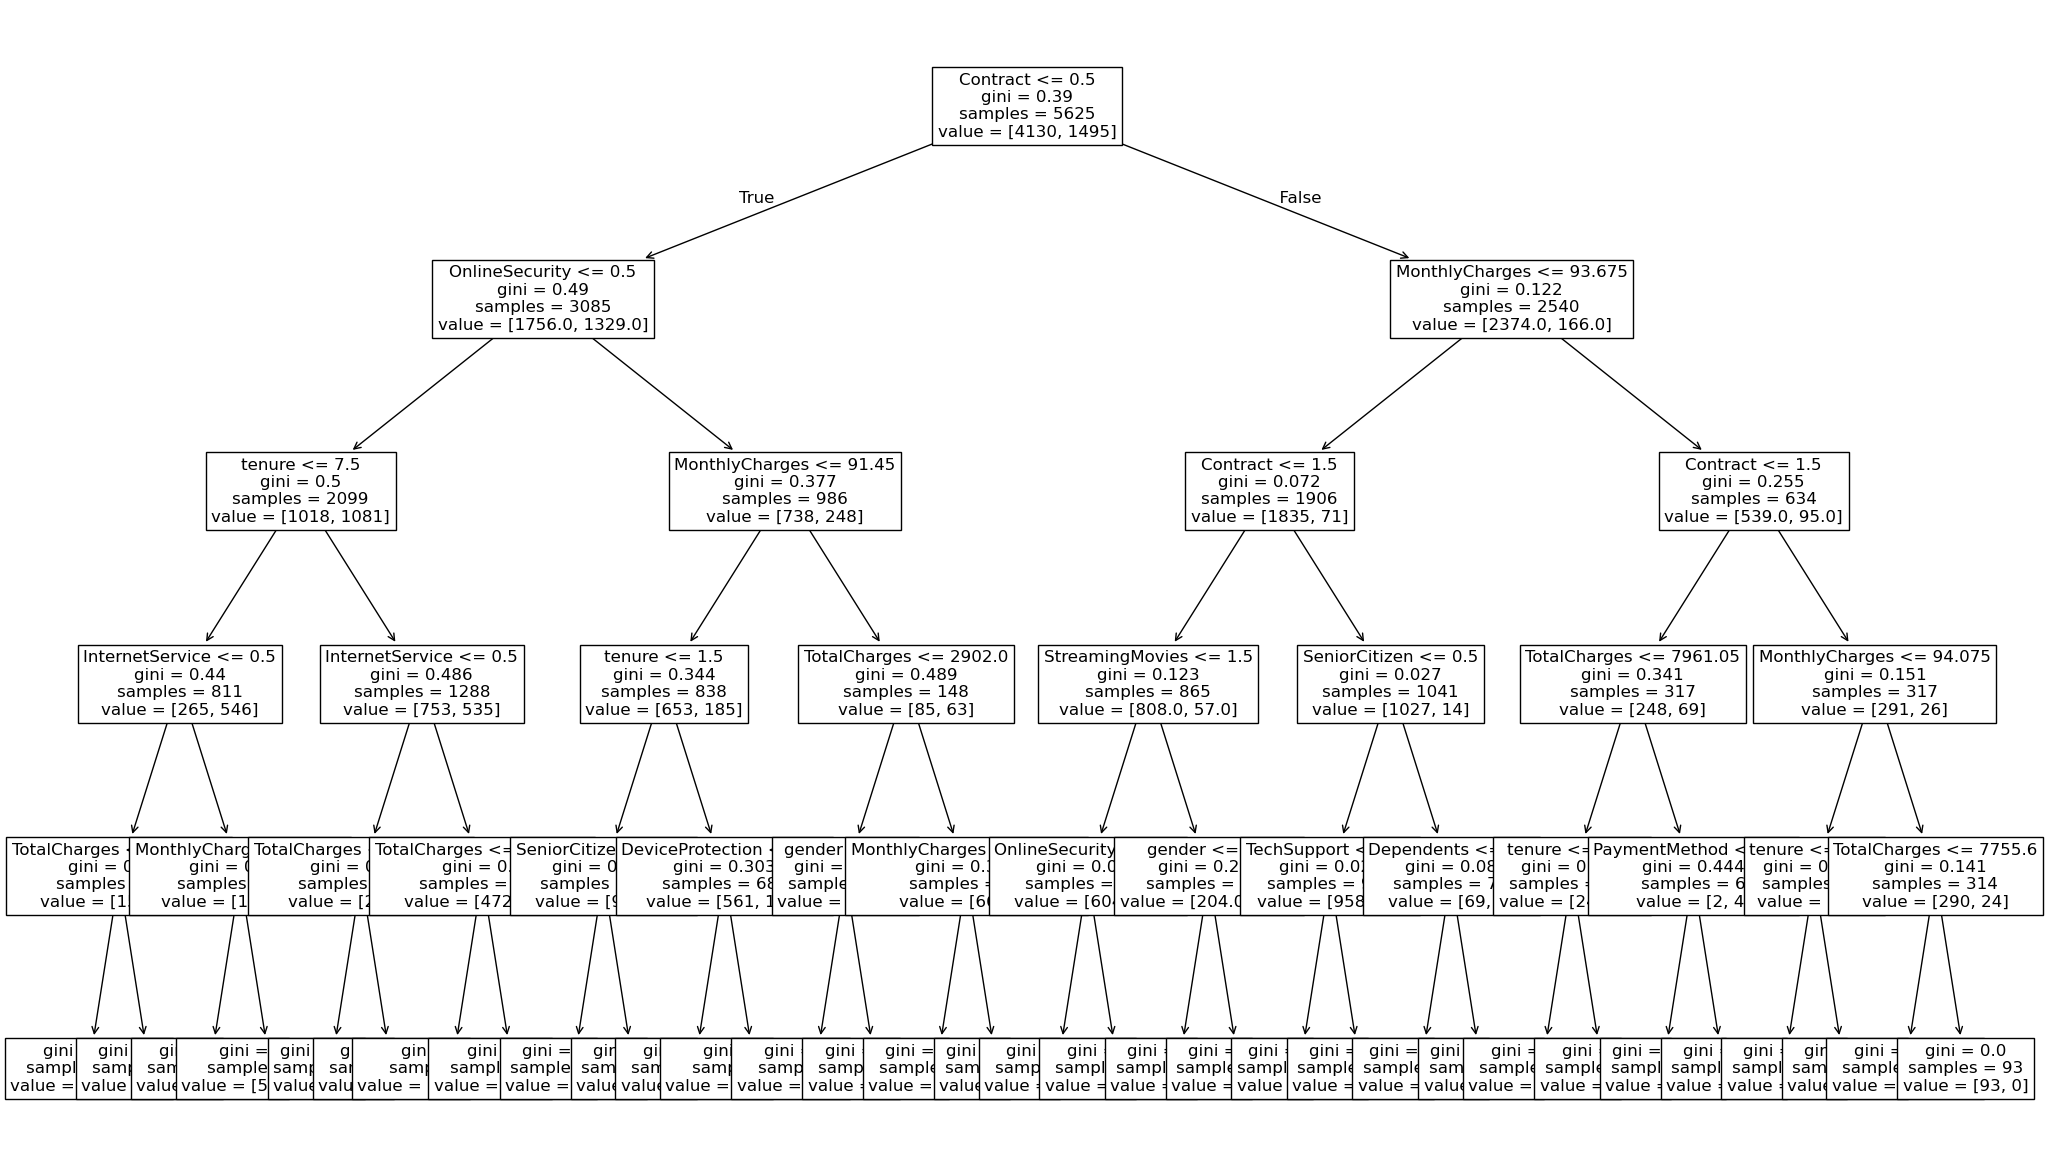

In [43]:
plt.figure(figsize=(25,15))
plot_tree(dt, max_depth=5,feature_names=X.columns, fontsize=12)
plt.show()

In [44]:
dt_pred_train=dt.predict(X_train)
dt_pred_test=dt.predict(X_test)

In [45]:
print("training accuracy - ",accuracy_score(y_train,dt_pred_train))
print("testing accuracy - ",accuracy_score(y_test,dt_pred_test))

training accuracy -  0.8069333333333333
testing accuracy -  0.7818052594171997


In [46]:
print("training precision - ",precision_score(y_train,dt_pred_train))
print("testing precision - ",precision_score(y_test,dt_pred_test))

training precision -  0.6767502160760588
testing precision -  0.6091205211726385


In [47]:
test_accuracy.append(accuracy_score(y_test,dt_pred_test))
test_precision.append(precision_score(y_test,dt_pred_test, pos_label=1))

In [48]:
training_accuracy.append(accuracy_score(y_train,dt_pred_train))
training_precision.append(precision_score(y_train,dt_pred_train, pos_label=1))

### Random Forest

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [50]:
rf_pred_train=rf.predict(X_train)
rf_pred_test=rf.predict(X_test)

In [51]:
print("training accuracy - ",accuracy_score(y_train,rf_pred_train))
print("testing accuracy - ",accuracy_score(y_test,rf_pred_test))

training accuracy -  0.7632
testing accuracy -  0.7277896233120114


In [52]:
print("training precision - ",precision_score(y_train,rf_pred_train))
print("testing precision - ",precision_score(y_test,rf_pred_test))

training precision -  0.5351444588184562
testing precision -  0.49261083743842365


In [53]:
print("training precision - ",classification_report(y_train,rf_pred_train))
print("testing precision - ",classification_report(y_test,rf_pred_test))

training precision -                precision    recall  f1-score   support

           0       0.92      0.74      0.82      4130
           1       0.54      0.83      0.65      1495

    accuracy                           0.76      5625
   macro avg       0.73      0.78      0.74      5625
weighted avg       0.82      0.76      0.78      5625

testing precision -                precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



In [54]:
test_accuracy.append(accuracy_score(y_test,rf_pred_test))
test_precision.append(precision_score(y_test,rf_pred_test, pos_label=1))

In [55]:
training_accuracy.append(accuracy_score(y_train,rf_pred_train))
training_precision.append(precision_score(y_train,rf_pred_train, pos_label=1))

### Ada boost classifier

In [56]:
ada.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [57]:
ada_pred_train=ada.predict(X_train)
ada_pred_test=ada.predict(X_test)

In [58]:
print("training accuracy - ",accuracy_score(y_train,ada_pred_train))
print("testing accuracy - ",accuracy_score(y_test,ada_pred_test))

training accuracy -  0.8112
testing accuracy -  0.7931769722814499


In [59]:
print("training precision - ",precision_score(y_train,ada_pred_train))
print("testing precision - ",precision_score(y_test,ada_pred_test))

training precision -  0.67558799675588
testing precision -  0.6246246246246246


In [60]:
print("training precision - ",classification_report(y_train,ada_pred_train))
print("testing precision - ",classification_report(y_test,ada_pred_test))

training precision -                precision    recall  f1-score   support

           0       0.85      0.90      0.88      4130
           1       0.68      0.56      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.81      5625

testing precision -                precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [61]:
test_accuracy.append(accuracy_score(y_test,ada_pred_test))
test_precision.append(precision_score(y_test,ada_pred_test, pos_label=1))

In [62]:
training_accuracy.append(accuracy_score(y_train,ada_pred_train))
training_precision.append(precision_score(y_train,ada_pred_train, pos_label=1))

### Gradient Descent

In [63]:
gbdt.fit(X_train, y_train)

GradientBoostingClassifier()

In [64]:
gbdt_pred_train=gbdt.predict(X_train)
gbdt_pred_test=gbdt.predict(X_test)

In [65]:
print("training accuracy - ",accuracy_score(y_train,gbdt_pred_train))
print("testing accuracy - ",accuracy_score(y_test,gbdt_pred_test))

training accuracy -  0.8321777777777778
testing accuracy -  0.7967306325515281


In [66]:
print("training precision - ",precision_score(y_train,gbdt_pred_train))
print("testing precision - ",precision_score(y_test,gbdt_pred_test))

training precision -  0.7336726039016115
testing precision -  0.6419354838709678


In [67]:
print("training precision - ",classification_report(y_train,gbdt_pred_train))
print("testing precision - ",classification_report(y_test,gbdt_pred_test))

training precision -                precision    recall  f1-score   support

           0       0.86      0.92      0.89      4130
           1       0.73      0.58      0.65      1495

    accuracy                           0.83      5625
   macro avg       0.80      0.75      0.77      5625
weighted avg       0.83      0.83      0.83      5625

testing precision -                precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [68]:
test_accuracy.append(accuracy_score(y_test,gbdt_pred_test))
test_precision.append(precision_score(y_test,gbdt_pred_test, pos_label=1))

In [69]:
training_accuracy.append(accuracy_score(y_train,gbdt_pred_train))
training_precision.append(precision_score(y_train,gbdt_pred_train, pos_label=1))

### creating dataframe 

In [103]:
clfs={"algorithms": ["log","knn","svc","dt","rf","ada","gbdt"],"training_accuracy":training_accuracy,
      "training_precision":training_precision,"test_accuracy":test_accuracy,"test_precision":test_precision}

In [104]:
perf=pd.DataFrame(clfs)

In [105]:
perf

,algorithms,training_accuracy,training_precision,test_accuracy,test_precision
0,log,0.803022,0.653938,0.793888,0.624260
1,knn,0.834133,0.709389,0.748401,0.526455
2,svc,0.824711,0.735867,0.785359,0.626761
3,dt,0.806933,0.676750,0.781805,0.609121
4,rf,0.763200,0.535144,0.727790,0.492611
5,ada,0.811200,0.675588,0.793177,0.624625
6,gbdt,0.832178,0.733673,0.796731,0.641935


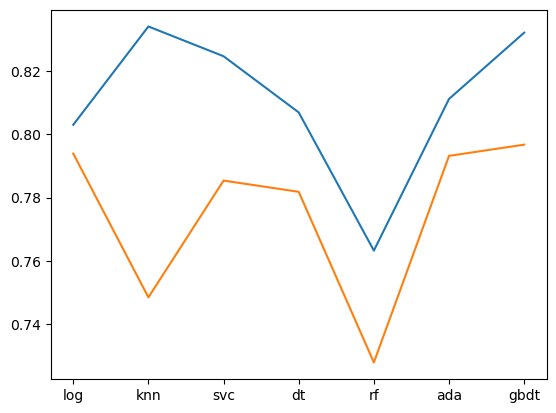

In [111]:
plt.plot(perf["algorithms"], perf["training_accuracy"],perf["test_accuracy"])

### Smote

In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [74]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [75]:
print(X_resampled.shape)
print(y_resampled.shape)

(10326, 19)
(10326,)


In [76]:
y_resampled.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [77]:
log.fit(X_resampled, y_resampled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
y_train_prediction=log.predict(X_train)
y_test_prediction=log.predict(X_test)

In [79]:
print(accuracy_score(y_train, y_train_prediction))
print(accuracy_score(y_test, y_test_prediction))

0.7637333333333334
0.746268656716418


In [80]:
print(precision_score(y_train, y_train_prediction))
print(precision_score(y_test, y_test_prediction))

0.5412115193644489
0.5162523900573613


In [81]:
print(classification_report(y_train, y_train_prediction))
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4130
           1       0.54      0.73      0.62      1495

    accuracy                           0.76      5625
   macro avg       0.71      0.75      0.72      5625
weighted avg       0.80      0.76      0.77      5625

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1033
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



In [82]:
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [83]:
y_rf_train=rf.predict(X_train)
y_rf_test=rf.predict(X_test)

In [84]:
print(accuracy_score(y_train, y_rf_train))
print(accuracy_score(y_test, y_rf_test))

0.7637333333333334
0.7540867093105899


In [85]:
print(precision_score(y_train, y_rf_train))
print(precision_score(y_test, y_rf_test))

0.5392992424242424
0.525830258302583


In [86]:
print(classification_report(y_train, y_rf_train))
print(classification_report(y_test, y_rf_test))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      4130
           1       0.54      0.76      0.63      1495

    accuracy                           0.76      5625
   macro avg       0.72      0.76      0.73      5625
weighted avg       0.80      0.76      0.77      5625

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.76      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



In [87]:
ada.fit(X_resampled, y_resampled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [88]:
y_ada_train=ada.predict(X_train)
y_ada_test=ada.predict(X_test)

In [89]:
print(accuracy_score(y_train, y_ada_train))
print(accuracy_score(y_test, y_ada_test))

0.7701333333333333
0.751954513148543


In [90]:
print(precision_score(y_train, y_ada_train))
print(precision_score(y_test, y_ada_test))

0.5510101010101011
0.5245579567779961


In [91]:
print(classification_report(y_train, y_ada_train))
print(classification_report(y_test, y_ada_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4130
           1       0.55      0.73      0.63      1495

    accuracy                           0.77      5625
   macro avg       0.72      0.76      0.73      5625
weighted avg       0.80      0.77      0.78      5625

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.52      0.71      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



In [92]:
gbdt.fit(X_resampled, y_resampled)

GradientBoostingClassifier()

In [93]:
y_gbdt_train=gbdt.predict(X_train)
y_gbdt_test=gbdt.predict(X_test)

In [94]:
print(accuracy_score(y_train, y_gbdt_train))
print(accuracy_score(y_test, y_gbdt_test))

0.7921777777777778
0.7761194029850746


In [95]:
print(precision_score(y_train, y_gbdt_train))
print(precision_score(y_test, y_gbdt_test))

0.5896589658965896
0.5621052631578948


In [96]:
print(classification_report(y_train, y_gbdt_train))
print(classification_report(y_test, y_gbdt_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      4130
           1       0.59      0.72      0.65      1495

    accuracy                           0.79      5625
   macro avg       0.74      0.77      0.75      5625
weighted avg       0.81      0.79      0.80      5625

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1033
           1       0.56      0.71      0.63       374

    accuracy                           0.78      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.78      0.78      1407



In [97]:
X_train.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

### Prediction

In [98]:
import joblib
with open("churn_model.pkl", "wb") as f:
    joblib.dump(rf,f)

In [99]:
with open("churn_model.pkl", "rb") as f:
    rf_model=joblib.load(f)

In [100]:
sample=[[1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50]]
sample1=[[1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15]]
df=pd.DataFrame(sample, columns=X_train.columns)

In [101]:
rf_model.predict(df)

array([0])

In [102]:
probs = rf_model.predict_proba(df)
print(f"Probability of Not Churn: {probs[0][0]:.2f}")
print(f"Probability of Churn: {probs[0][1]:.2f}")

Probability of Not Churn: 0.87
Probability of Churn: 0.13
